%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Here we plot the weight difference colormap of tpdx-tpdy and epx-epy


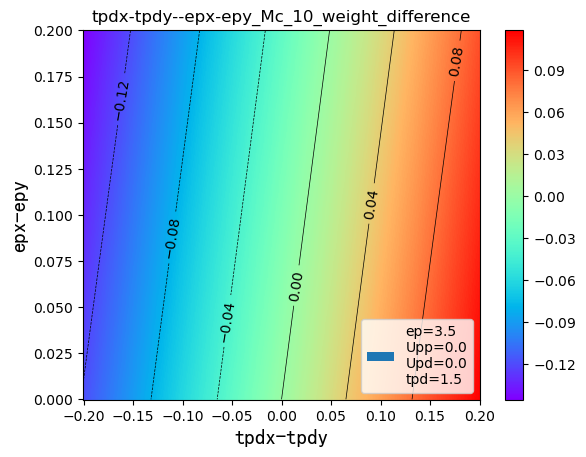

In [1]:
%pylab inline
%matplotlib inline
import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *
import scipy as sp
from scipy.optimize import leastsq
from scipy.interpolate import Rbf  # radial basis functions
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def adjust_array_length(a, desired_length):
    start = a[0]
    end = a[-1]
    adjusted_array = np.linspace(start, end, desired_length)
    return adjusted_array

def take_between_values_inclusive(arr, target_value1, target_value2):
    mask = (arr >= target_value1) & (arr <= target_value2)
    result_array = arr[mask]
    return result_array



ed = 0
tpd = 1.5
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.0
B = 0.15
C = 0.58

ep_avgs = np.arange(3.5, 7.01, 3.5) 
difs = np.arange(0.0, 0.101, 0.01)
#for computing critical points and plotting precise figures
# ep_avgs1 = np.arange(0.0, 6.49, 0.5)
# ep_avgs2 = np.arange(6.5, 8.99, 0.1)
# ep_avgs3 = np.arange(9.00,12.01 , 0.5)
# ep_avgs=np.hstack((np.hstack((ep_avgs1, ep_avgs2)),ep_avgs3))

# ep_avgs=np.arange(7.9,8.21,0.02)
# ep_difs = np.arange(0.0, 0.051, 0.005) 

As = np.arange(6.0, 6.01, 1.0)
B = 0.15
C = 0.58
#As = np.arange(100, 100.1, 1.0)
#As = np.arange(0, 0.1, 1.0)
#B = 0
#C = 0

Upps = np.arange(3, 4.01, 10)
Vpps = np.arange(0.0, 0.01, 0.1)
Udifs = np.arange(-1.0,1.01,0.1)

Upds = np.arange(0.5,0.51,10)
Updfs = np.arange(-0.1,0.101,0.01)

tpddiffs = np.arange(-0.2, 0.2001, 0.04)

Norb = 7
Mc = 10
eta = 0.2



#Choose X&Y labels
#There are Upp,Udif(Upp difference),Upd,Updf(Upd difference),ep and ep difference ,you should choose two as X&Y labels
All_labels = ('Upp','Udif','Upd','Updf','ep','dif','tpddiff')
All_axis_names = ('Upp','Uppx-Uppy','Upd','Updx-Updy','ep','epx-epy','tpdx-tpdy')
X = All_labels[6]
Y = All_labels[5]
axisX = All_axis_names[6]
axisY = All_axis_names[5]

Idx  = ['0.0']*7

for  i in All_labels:
    if X==i:
        Idx[All_labels.index(i)]='XX'
    elif Y==i:
        Idx[All_labels.index(i)]='YY'
print('Here we plot the weight difference colormap of',axisX,'and',axisY)

Xi = []
Yi = []
Zi = []
Ws = []
if X == 'ep'and Y == 'dif':
    fig_name = axisX+'--'+axisY+'_Mc_'+str(Mc)+'_whtdiff_colormap'+'.pdf'
    for epdif in difs:
        diff=round(epdif,4)
        if Norb==7:
            ff = 'GS_weights_Norb7_tpp'+str(tpp)+'_diff'+str(diff)+'_Upp0.0'+'_Udif0.0' \
                 +'_Vpp0.0'+'_Upd0.0_Updf0.0'+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        if Norb==9 or Norb==11:
            ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff'+str(diff)+\
             '_Upp0.0'+'_Udif0.0'+'_Vpp0.0'+'_Upd0.0_Updf0.0'+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        a = loadtxt('./data_GS/'+ff,skiprows=0)
        if Norb==9 or Norb==11:
            a = np.delete(a, 3, axis=1)
            
        seen_values = set()
        a_new = []
        for row in a:
            value = row[1]
            if value not in seen_values:
                a_new.append(row)
                seen_values.add(value)
        sorted_a= sorted(a_new, key=lambda x: x[1])
        sorted_a=np.array(sorted_a)
        for i in range(1,len(sorted_a)):
            if abs(sorted_a[i,7]-sorted_a[i-1,7])>0.3:
                cp = round((sorted_a[i-1,1]+sorted_a[i-1,2])*0.5+0.05,2)
                idx = i-1
                break
        for i in range(len(sorted_a)):
            if i<=idx:
                Xi.append((sorted_a[i,1]+sorted_a[i,2])*0.5)
                Yi.append(diff)
                Zi.append(sorted_a[i,11]-sorted_a[i,17])
            else:
                Xi.append((sorted_a[i,1]+sorted_a[i,2])*0.5)
                Yi.append(diff)
                Zi.append(sorted_a[i,9]-sorted_a[i,15])
elif Y=='dif' and (X=='Udif' or X=='Updf' or X=='tpddiff'):
    fixed_Upp=0.0
    fixed_Upd=0.0
    fixed_tpd=1.5
    fixed_ep=7.0     #3.5 or 7.0
    fig_name = axisX+'--'+axisY+'_tpd'+str(fixed_tpd)+'_ep'+str(fixed_ep)+'_Upp'+str(fixed_Upp)+'_Upd'+str(fixed_Upd)\
    +'_Mc_'+str(Mc)+'_whtdiff_colormap'+'.pdf'
    for XX in eval(X+'s'):
        XX = round(XX,4)
        for YY in eval(Y+'s'):
            YY = round(YY,4)
            if Norb==7:
                ff = 'GS_weights_Norb7'+'_tpd'+str(fixed_tpd)+'_tpddiff'+str(eval(Idx[6]))+'_tpp'+str(tpp)+\
                '_diff'+str(eval(Idx[5]))+'_Upp'+str(fixed_Upp)+'_Udif'+str(eval(Idx[1]))\
                     +'_Vpp'+str(0.0)+'_Upd'+str(fixed_Upd)+'_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
            if Norb==9 or Norb==11:
                ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff'+str(eval(Idx[5]))+\
                     '_Upp'+str(fixed_Upp)+'_Udif'+str(eval(Idx[1]))+'_Vpp'+str(0.0)+'_Upd'+str(fixed_Upd)+\
                     '_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
            c = loadtxt('./data_GS/'+ff,skiprows=0)
            if Norb==9 or Norb==11:
                c = np.delete(c, 3, axis=1)
            if c.ndim==1:
                if (c[1]+c[2])==fixed_ep*2:
                    Xi.append(XX)
                    Yi.append(YY)
                    Zi.append(c[11]-c[17])
                else:
                    print('There is no ep=3.5 data in the file.')
            else:
                for i in range(len(c)):
                    if c[i,1]+c[i,2]==fixed_ep*2:
                        Xi.append(XX)
                        Yi.append(YY)
                        Zi.append(c[i,11]-c[i,17])
                        break

    
    
else:
    fixed_ep=3.5       #3.5 or 7.0
    fig_name = axisX+'--'+axisY+'_ep'+str(fixed_ep)+'_Mc_'+str(Mc)+'_whtdiff_colormap'+'.pdf'
    for epdif in difs:
        diff=round(epdif,4)
        if Norb==7:
            ff = 'GS_weights_Norb7_tpp'+str(tpp)+'_diff'+str(diff)+'_Upp0.0'+'_Udif0.0' \
                 +'_Vpp0.0'+'_Upd0.0_Updf0.0'+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        if Norb==9 or Norb==11:
            ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff'+str(diff)+\
             '_Upp0.0'+'_Udif0.0'+'_Vpp0.0'+'_Upd0.0_Updf0.0'+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        a = loadtxt('./data_GS/'+ff,skiprows=0)
        if Norb==9 or Norb==11:
            a = np.delete(a, 3, axis=1)
        if a.ndim==1:
            if (a[1]+a[2])*0.5==fixed_ep:
                weightdiff = a[11]-a[17]
                Ws.append(weightdiff)
            else:
                print('There is no ep='+str(fixed_ep)+' data in the file.')        
        else:
            for i in range(len(a)):
                if a[i,1]+a[i,2]==fixed_ep*2:
                    weightdiff = a[i,11]-a[i,17]
                    Ws.append(weightdiff)
                    break

    for XX in eval(X+'s'):
        XX = round(XX,4)
        for YY in eval(Y+'s'):
            YY = round(YY,4)
            if Norb==7:
                ff = 'GS_weights_Norb7_tpp'+str(tpp)+'_diff0.0_Upp'+str(eval(Idx[0]))+'_Udif'+str(eval(Idx[1])) \
                     +'_Vpp'+str(0.0)+'_Upd'+str(eval(Idx[2]))+'_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
            if Norb==9 or Norb==11:
                ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff0.0'+\
                     '_Upp'+str(eval(Idx[0]))+'_Udif'+str(eval(Idx[1]))+'_Vpp'+str(0.0)+'_Upd'+str(eval(Idx[2]))+\
                     '_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
            c = loadtxt('./data_GS/'+ff,skiprows=0)
            if Norb==9 or Norb==11:
                c = np.delete(c, 3, axis=1)
            if c.ndim==1:
                if (c[1]+c[2])*0.5==fixed_ep:
                    Xi.append(XX)
                    Yi.append(YY)
                    Zi.append(abs(c[11]-c[17]))
                else:
                    print('There is no ep='+str(fixed_ep)+' data in the file.')    
            else:
                for i in range(len(c)):
                    if c[i,1]+c[i,2]==fixed_ep*2:
                        Xi.append(XX)
                        Yi.append(YY)
                        Zi.append(c[i,11]-c[i,17])
                        break

#RBF Function
rbf_fun = Rbf(Xi, Yi, Zi, function='cubic')

Xi_new = adjust_array_length(eval(X+'s'), 500)
Yi_new = adjust_array_length(eval(Y+'s'), 500)

# Xi_new = take_between_values_inclusive(Xi_new, 9, 12)
# Yi_new = take_between_values_inclusive(Yi_new,0, 0.1)#no more than Xi_new[-1] or Yi_new[-1]

x_grid, y_grid = np.meshgrid(Xi_new, Yi_new)
Zi_new = rbf_fun(x_grid.ravel(), y_grid.ravel()).reshape(x_grid.shape)
if X=='Udif'or X=='Updf' or X=='dif':
    Xi_new=2*Xi_new
if Y=='Udif'or Y=='Updf' or Y=='dif':
    Yi_new=2*Yi_new

fig = plt.pcolor(Xi_new,Yi_new, Zi_new,cmap=plt.cm.rainbow)

C = plt.contour(Xi_new, Yi_new, Zi_new,colors='black',linewidths=0.5,extend='both')
plt.clabel(C, inline=True, fontsize=10)

colorbar = plt.colorbar(fig,ticks=ticker.MaxNLocator(nbins=10))
colorbar.formatter = ScalarFormatter(useMathText=True)
colorbar.update_ticks()
# colorbar.set_label('Weight difference', rotation=270, labelpad=15)

plt.legend(labels=['ep='+str(fixed_ep)+'\nUpp='+str(fixed_Upp)+'\nUpd='+str(fixed_Upd)+'\ntpd='+str(fixed_tpd)],loc='lower right') 
plt.xlabel(axisX, fontproperties='simHei', fontsize=15)
plt.ylabel(axisY, fontproperties='simHei', fontsize=15)
plt.title(axisX+'--'+axisY+'_Mc_'+str(Mc)+'_weight_difference')
savefig(fig_name)
                            